# input= (275, 205, 3)으로 변경
# epochs = 35
#  batch_size = 32

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow

tensorflow.__version__

'2.7.0'

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/emotion_2000.zip'

-rw------- 1 root root 1579790273 Nov 12 03:09 '/content/drive/My Drive/Colab Notebooks/emotion_2000.zip'


In [ ]:
!unzip '/content/drive/My Drive/Colab Notebooks/emotion_2000.zip'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/unrest/43e963ac1393e8d19170c9ab063fbd3622b53c0e07acd4680b1f555d44772d49_여_30_불안_상업시설&점포&시장_20210126005617-003-020.jpg  
  inflating: train/unrest/43e963ac1393e8d19170c9ab063fbd3622b53c0e07acd4680b1f555d44772d49_여_30_불안_상업시설&점포&시장_20210126005617-003-023.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_공공시설&종교&의료시설_20201204102356-001-007.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_공공시설&종교&의료시설_20201204102356-001-010.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_교통&이동수단(엘리베이터 포함)_20201204102418-002-005.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_도심 환경_20201204102957-008-005.jpg  
  inflating: train/unrest/440d245048f7b149a1bb02d5bcc10ef42bfb1e99cc392bea0394d367d6cc78ca_여_20_불안_도심 환경_20201204102957-008-

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import cv2

In [ ]:
train_dir = 'train'
valid_dir = 'validation'
#test_dir = 'test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(15)

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=15,
                             width_shift_range=0.01,
                             height_shift_range=0.01,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=False,
                             fill_mode='nearest')



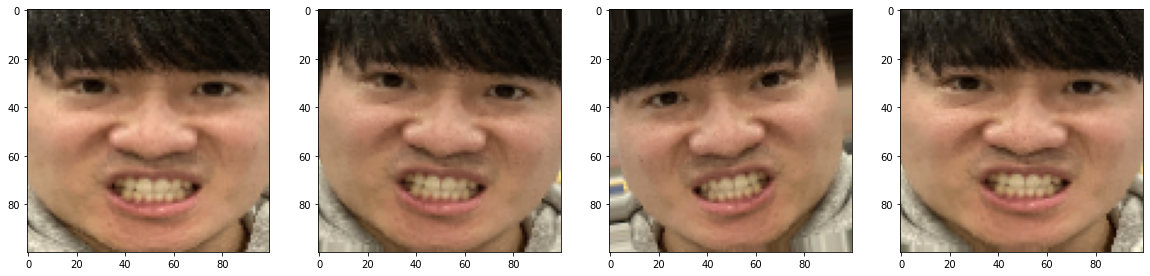

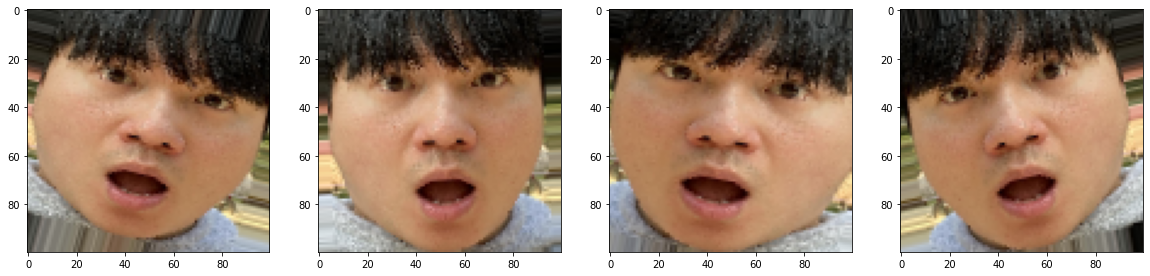

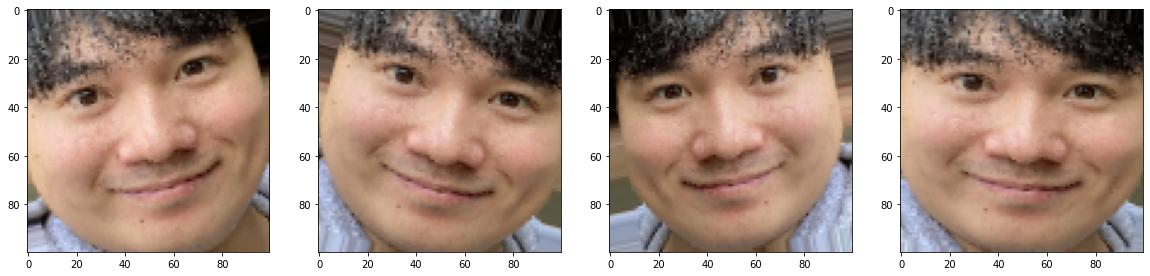

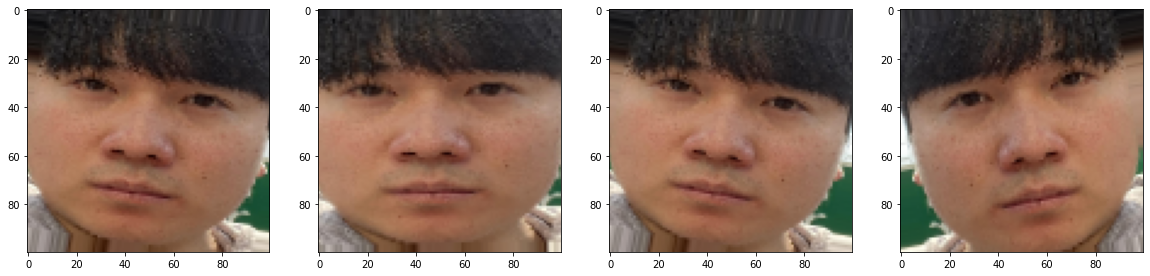

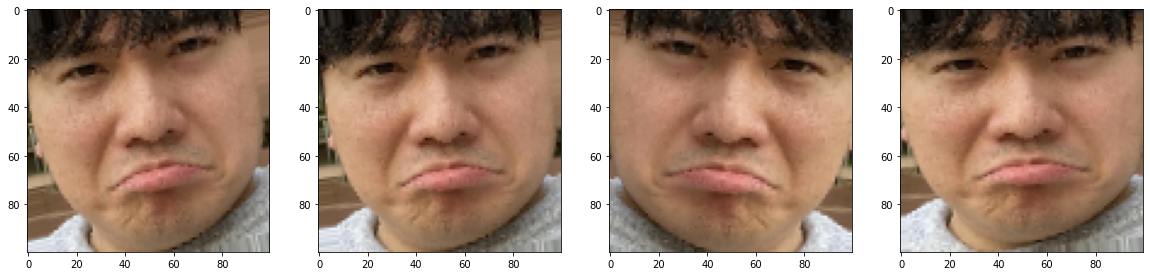

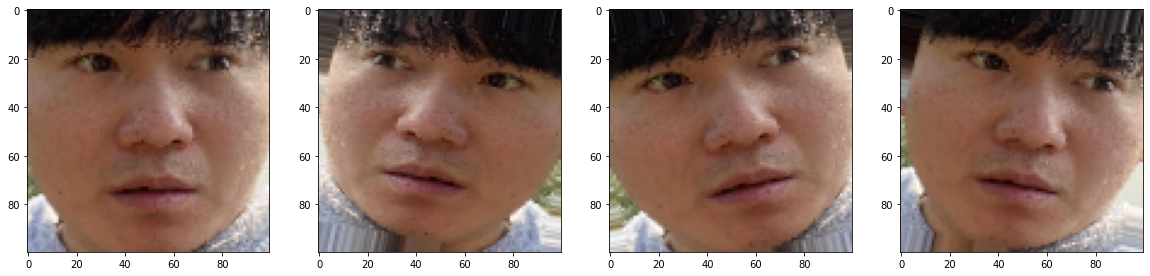

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

emotion = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']

for num in range(0,6):
  train_dir =  os.path.join('train', emotion[num])
  fnames = sorted([os.path.join(train_dir, fname) for fname in os.listdir(train_dir)])

  # 테스트 이미지 선택
  img_path = fnames[8]

  # 이미지 읽고 크기 변경
  img = image.load_img(img_path, target_size=(100, 100))

  # (150, 150, 3) 배열 변환
  x = image.img_to_array(img)

  # (1, 150, 150, 3) 변환
  x = x.reshape((1,) + x.shape)

  # 랜덤하게 변환된 이미지 배치 생성
  i = 0

  plt.figure(figsize=(20,10))
  for batch in datagen.flow(x, batch_size=1):

      plt.subplot(1,4,i+1)
      imgplot = plt.imshow(image.array_to_img(batch[0]))
      i += 1
      if i % 4 == 0:
          break

  plt.show()







In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   width_shift_range=0.01,
                                   height_shift_range=0.01,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (275, 205), 
                  batch_size = 32, 
                  class_mode = 'categorical') 


valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (275, 205),
                  batch_size = 32,
                  class_mode = 'categorical')

Found 12000 images belonging to 6 classes.
Found 4800 images belonging to 6 classes.


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=36, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(275, 205,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=96, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=144, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax')
])

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.0001),
              metrics = ['accuracy'])
              
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 67, 49, 36)        13104     
                                                                 
 batch_normalization (BatchN  (None, 67, 49, 36)       144       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 24, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 24, 96)        86496     
                                                                 
 batch_normalization_1 (Batc  (None, 33, 24, 96)       384       
 hNormalization)                                                 
                                                        

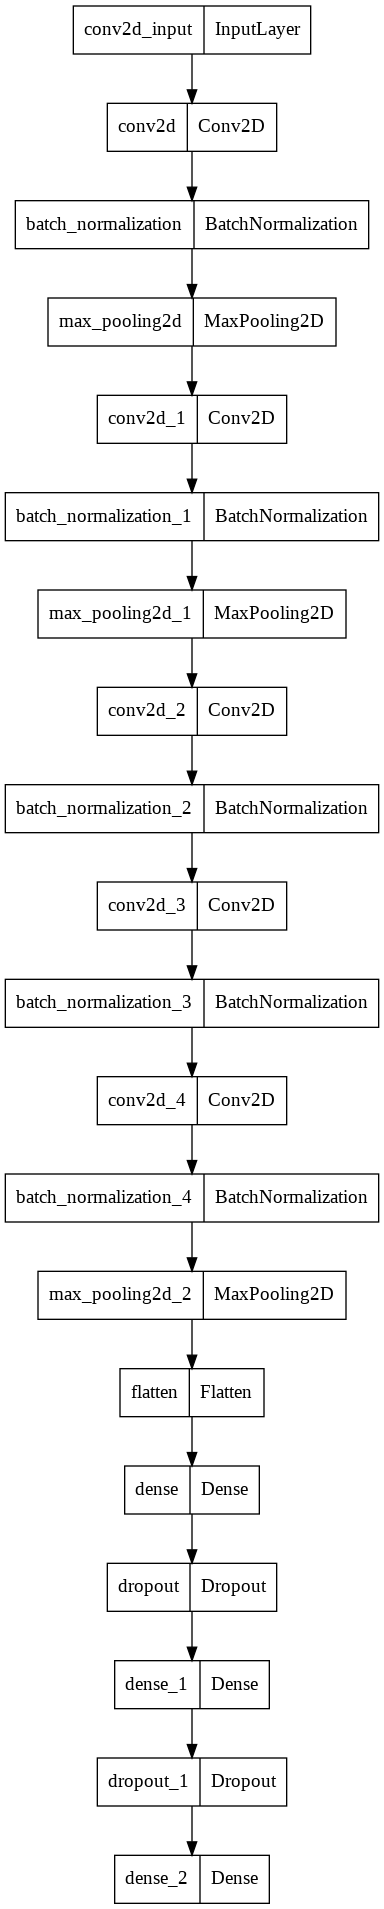

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
'''
model.fit(train_ds,
          epochs=50,
          validation_data=validation_ds,
          validation_freq=1,
          callbacks=[tensorboard_cb])
'''

'\nmodel.fit(train_ds,\n          epochs=50,\n          validation_data=validation_ds,\n          validation_freq=1,\n          callbacks=[tensorboard_cb])\n'

In [ ]:
%%time

Hist_dandc = model.fit(train_generator,
                       epochs = 35,                       
                       #steps_per_epoch = 300,
                       validation_data = valid_generator,
                       validation_steps = 100)


Epoch 1/35
375/375 [==============================] - 383s 939ms/step - loss: 2.0456 - accuracy: 0.2170 - val_loss: 1.7955 - val_accuracy: 0.2463
Epoch 2/35
375/375 [==============================] - 353s 941ms/step - loss: 1.6254 - accuracy: 0.3203 - val_loss: 1.4449 - val_accuracy: 0.3859
Epoch 3/35
375/375 [==============================] - 353s 942ms/step - loss: 1.4976 - accuracy: 0.3721 - val_loss: 1.6704 - val_accuracy: 0.2806
Epoch 4/35
375/375 [==============================] - 351s 935ms/step - loss: 1.4147 - accuracy: 0.4251 - val_loss: 1.3612 - val_accuracy: 0.4441
Epoch 5/35
375/375 [==============================] - 352s 940ms/step - loss: 1.3347 - accuracy: 0.4667 - val_loss: 1.3910 - val_accuracy: 0.4459
Epoch 6/35
375/375 [==============================] - 358s 955ms/step - loss: 1.2715 - accuracy: 0.5055 - val_loss: 1.3426 - val_accuracy: 0.4850
Epoch 7/35
375/375 [==============================] - 353s 941ms/step - loss: 1.2072 - accuracy: 0.5349 - val_loss: 1.3685 -

In [ ]:
#matrix

In [ ]:
np.mean(Hist_dandc.history['val_accuracy'])

0.5999464324542454

In [ ]:
np.max(Hist_dandc.history['val_accuracy'])

0.6959375143051147

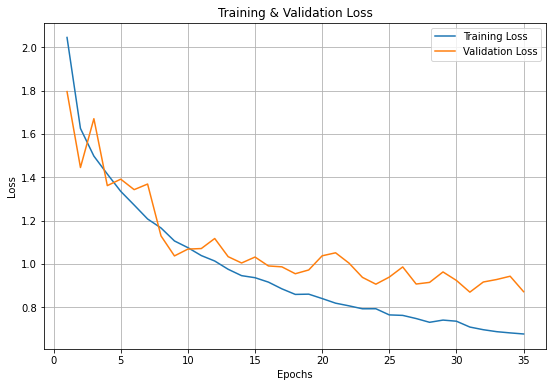

In [ ]:
#학습할 때 Loss를 찍어보면서 값이 낮아지는 것을 모니터링

import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
#plt.ylim([0,1.0])
plt.grid()
plt.show()




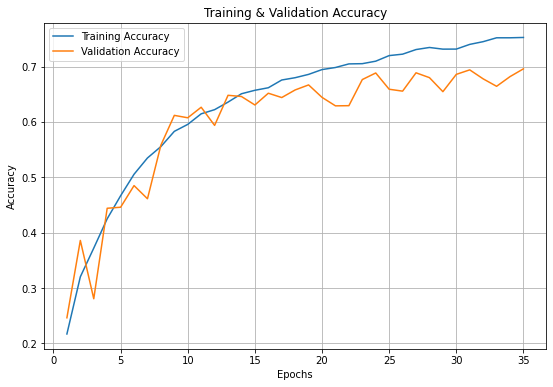

In [ ]:
#Loss와는 반대로 학습할 때 acc 값이 높아져야..
#테스트 세트의 정확도 < 훈련 세트의 정확도 -> 과대적합(overfitting) 
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [ ]:

model.save('/content/drive/My Drive/Colab Notebooks/emotion/color_alexnet(4).h5')


In [ ]:
from tensorflow.keras.models import load_model

model_small = load_model('/content/drive/My Drive/Colab Notebooks/emotion/color_alexnet(4).h5')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 valid_dir,
                 target_size = (275, 205),
                 batch_size = 32,
                 class_mode = 'categorical')
                
loss, accuracy = model_small.evaluate(test_generator,
                                steps = 38)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))


Found 4800 images belonging to 6 classes.
38/38 [==============================] - 19s 482ms/step - loss: 0.8463 - accuracy: 0.6982
Loss = 0.84635
Accuracy = 0.69819


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

test_generator = test_datagen.flow_from_directory(
                 valid_dir,
                 target_size = (275, 205),
                 batch_size = 32,
                 class_mode = 'categorical',
                 shuffle = False)

test_generator.reset()

target_names = ['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']

Y_pred = model_small.predict(test_generator, 38)
y_pred = np.argmax(Y_pred, axis=1)
print(target_names )
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Found 4800 images belonging to 6 classes.
['anger', 'embarrassment', 'happy', 'neutrality', 'sad', 'unrest']
Confusion Matrix
[[519  44  31  46  41 119]
 [ 61 542  10  62   6 119]
 [ 39  12 727   5  11   6]
 [ 53  11  13 662  10  51]
 [ 65   8  17  61 535 114]
 [110  97  11 131  76 375]]
Classification Report
               precision    recall  f1-score   support

        anger       0.61      0.65      0.63       800
embarrassment       0.76      0.68      0.72       800
        happy       0.90      0.91      0.90       800
   neutrality       0.68      0.83      0.75       800
          sad       0.79      0.67      0.72       800
       unrest       0.48      0.47      0.47       800

     accuracy                           0.70      4800
    macro avg       0.70      0.70      0.70      4800
 weighted avg       0.70      0.70      0.70      4800



In [ ]:
def find_key(dict, val):
  return next(key for key, value in dict.items() if value == val)

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/emotion/보관'

In [ ]:
os.listdir(path)

['스크린샷 2021-11-10 오후 3.18.46.png',
 '스크린샷 2021-11-10 오후 3.20.41.png',
 '스크린샷 2021-11-10 오후 3.23.21.png',
 '스크린샷 2021-11-10 오후 3.24.27.png',
 '스크린샷 2021-11-10 오후 3.25.01.png',
 '스크린샷 2021-11-10 오후 3.25.37.png',
 '스크린샷 2021-11-10 오후 3.27.21.png',
 '스크린샷 2021-11-12 오전 11.28.35.png',
 '스크린샷 2021-11-12 오전 11.29.51.png',
 '스크린샷 2021-11-12 오전 11.30.21.png',
 '스크린샷 2021-11-16 오후 4.03.52.png',
 '스크린샷 2021-11-16 오후 4.05.43.png',
 '스크린샷 2021-11-16 오후 4.06.05.png',
 '스크린샷 2021-11-16 오후 4.07.23.png',
 '스크린샷 2021-11-16 오후 4.07.50.png']

In [ ]:
class_dict = {'angry': 0, 'embarrassment': 1, 'happy': 2, 'neutrality': 3, 'sad': 4, 'unrest': 5}

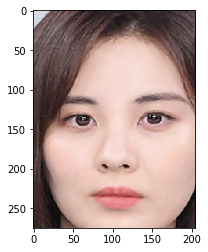

[[0. 0. 0. 1. 0. 0.]]
3
angry: 0.0
embarrassment: 0.0
happy: 0.0
neutrality: 1.0
sad: 0.0
unrest: 0.0
감정 분류 결과 : neutrality 입니다


In [ ]:
#~14
img = image.load_img(path + '/' + os.listdir(path)[4], target_size=(275, 205))
plt.imshow(img)
plt.show()

img  = image.img_to_array(img)
img  = np.expand_dims(img , axis = 0)
#print(test_generator.class_indices)
pred = model_small.predict(img)
print(pred)
print(np.argmax(pred))

print('angry:',  pred[0][0])
print('embarrassment:',  pred[0][1])
print('happy:',  pred[0][2])
print('neutrality:',  pred[0][3])
print('sad:',  pred[0][4])
print('unrest:',  pred[0][5])  

print('감정 분류 결과 : %s 입니다' %find_key(class_dict, np.argmax(pred)))